## Lead scoring case study
The goal of this case study is to identify the users who are likely to convert so the team at X Education can better allocate the man power.

Here are the steps for this case study- 
> 1. Data understanding 
> 2. Data preparation
>> 2.1. Categorical variables
>>> 2.1.1. Treating "Select" in certain columns \
>>> 2.1.2. Removing columns with high null values \
>>> 2.1.3. Removing columns with Zero or low variance
>>>
>> 2.2. Numeric variables
>>> 2.2.1. Outlier Treatment \
>>> 2.2.2. Feature Engineering \
>>> 2.2.3. Imputing Missing value
>>>
>>
> 3. Dummy variables creation
>> 3.1. Variables with null \
>> 3.2. Variables without null
>>
> 4. Model Building and evaluation
>> 4.1. Test-Train Split \
>> 4.2. Scaling \
>> 4.3. Building the model \
>> 4.4 Evaluting the model
>>> 4.4.1 Accuracy and related matrix \
>>> 4.4.2 Metrics beyond simply accuracy \
>>> 4.4.3 Plotting the ROC Curve 
>>> 
>> 4.5 Finding Optimal Cutoff Point
>>>
> 5. Making Predictions
>> 5.1. Saving important variables \
>> 5.2. Calculating the probability

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# so we dont get data omitted
pd.set_option("display.max_columns",500)
pd.set_option("display.max_colwidth",200)

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [6]:
df.describe(include="all")

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
df.Converted.sum()/df.shape[0]

0.3853896103896104

Lead conversation rate is around 38% for the current data set.

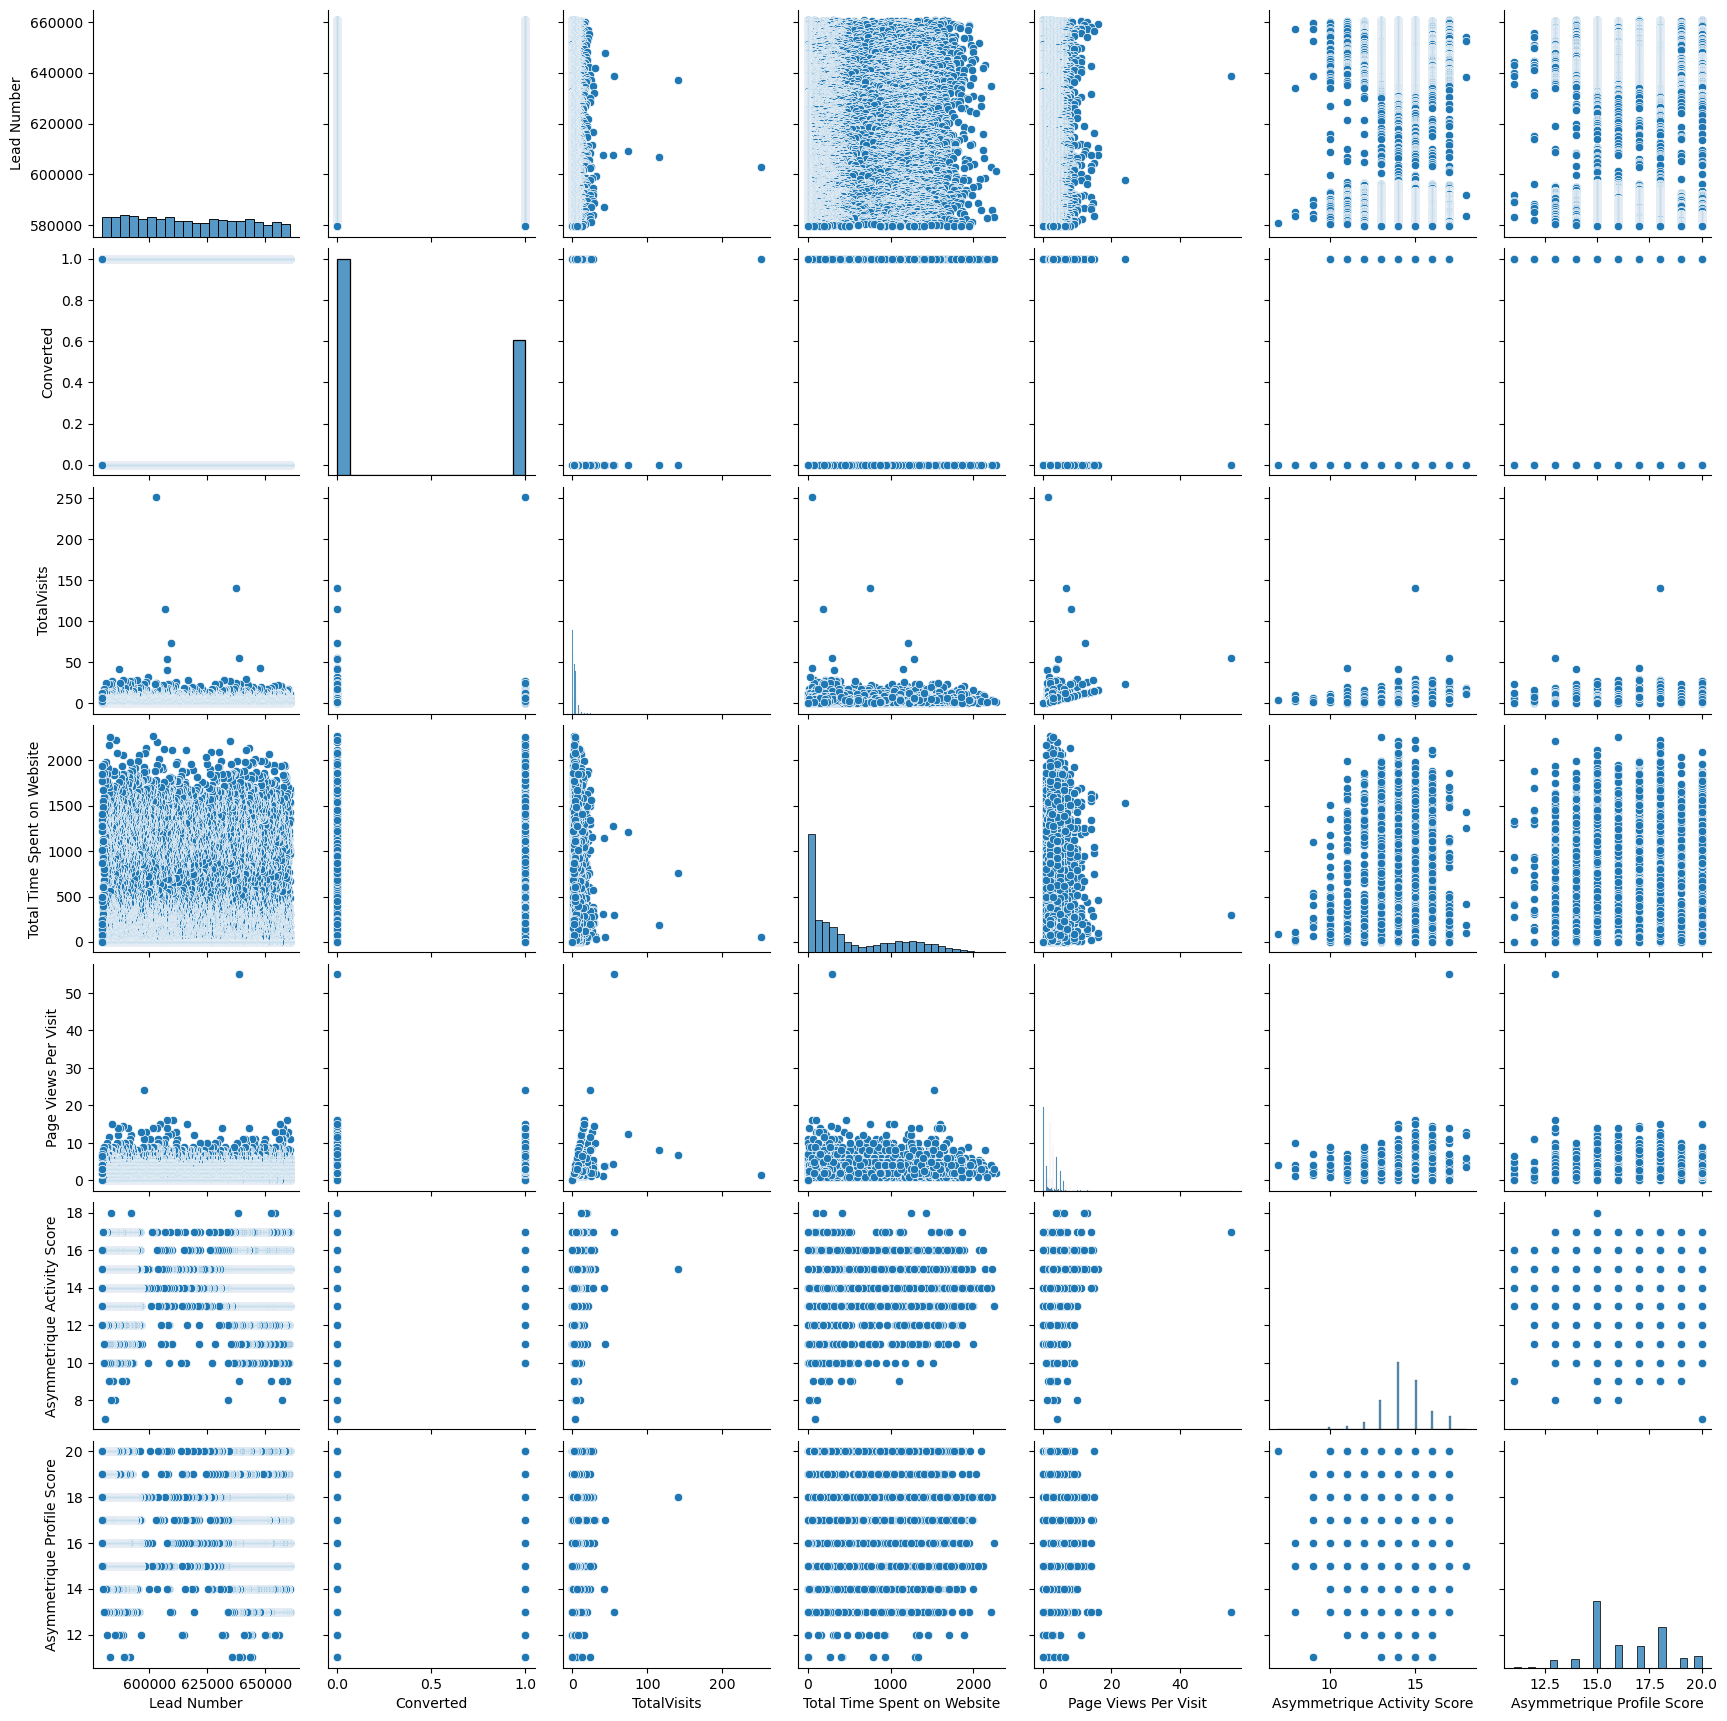

In [8]:
sns.pairplot(df)

## 2. Data preparation

In [9]:
#### Prospect ID and Lead Number are unique for every row, so they should be removed asap
df = df.drop(columns=["Prospect ID","Lead Number"], axis=1)
# df = df.drop(columns=["Prospect ID"], axis=1)

### 2.1. Categorial columns

Function to check and visualize all the categorical variables to get better understanding of very column and make decsion about how to impute missing values

In [10]:
def create_bar_plot(category, df):
    sns.barplot(x=category, y="Converted", data=df, estimator='mean')
    plt.xlabel(category)
    plt.ylabel('Mean Converted')
    plt.xticks(rotation=90)
    plt.show()

def check_categorical_column(col_name, df):
    values = df[col_name].dropna().unique()

    # add first line for printing
    data = [{"Value":"Value", "converted":"Converted", "frequency":"Frequency", "percent":"Converted-Percentage"}]
    
    for val in values:
        converted = df[df[col_name]==val]["Converted"].sum()
        frequency = df[df[col_name]==val][col_name].count()
        data.append({"Value":val, "converted":converted, "frequency":frequency, "percent":round(converted/frequency*100,2)})

    if (df[col_name].isnull().sum()):
        converted = df[df[col_name].isnull()]["Converted"].sum()
        frequency = df[col_name].isnull().sum()
        data.append({"Value":"Null", "converted":converted, "frequency":frequency,"percent":round(converted/frequency*100,2)})

    # formatting for clarity
    # Extract column names
    columns = list(data[0].keys())

    
    # Find the maximum length of each column to determine spacing
    max_lengths = [max(len(str(item[col])) for item in data) for col in columns]
    
    # Print the formatted values with constant spacing
    for row in data:
        formatted_row = ' '.join(f"{row[col]:{length}}" for col, length in zip(columns, max_lengths))
        print(formatted_row)

    create_bar_plot(col_name, df)

##### 2.1.1. Setting "Select" as null
Many columns have `Select` as value but that is because of how the online form is made. These values should be treated as null.

In [11]:
df = df.replace('Select', np.NaN)

In [12]:
cat_columns = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()

Value                   Converted Frequency Converted-Percentage
API                          1115      3580                31.15
Landing Page Submission      1768      4886                36.19
Lead Add Form                 664       718                92.48
Lead Import                    13        55                23.64
Quick Add Form                  1         1                100.0


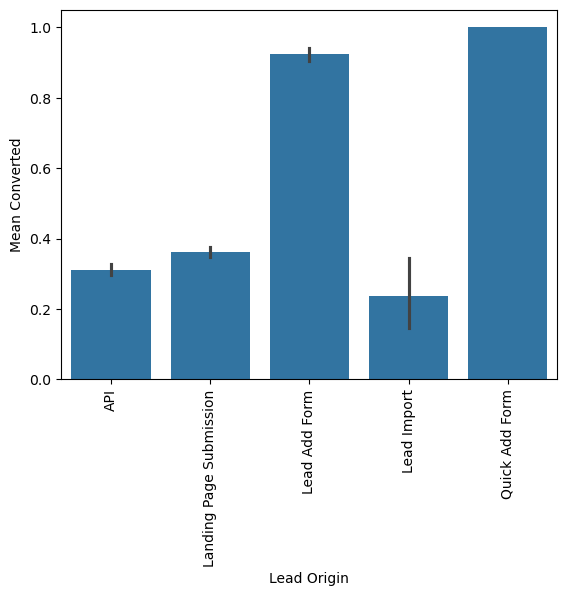

Value             Converted Frequency Converted-Percentage
Olark Chat              448      1755                25.53
Organic Search          436      1154                37.78
Direct Traffic          818      2543                32.17
Google                 1147      2868                39.99
Referral Sites           31       125                 24.8
Welingak Website        140       142                98.59
Reference               490       534                91.76
google                    0         5                  0.0
Facebook                 13        55                23.64
blog                      0         1                  0.0
Pay per Click Ads         0         1                  0.0
bing                      1         6                16.67
Social Media              1         2                 50.0
WeLearn                   1         1                100.0
Click2call                3         4                 75.0
Live Chat                 2         2                100

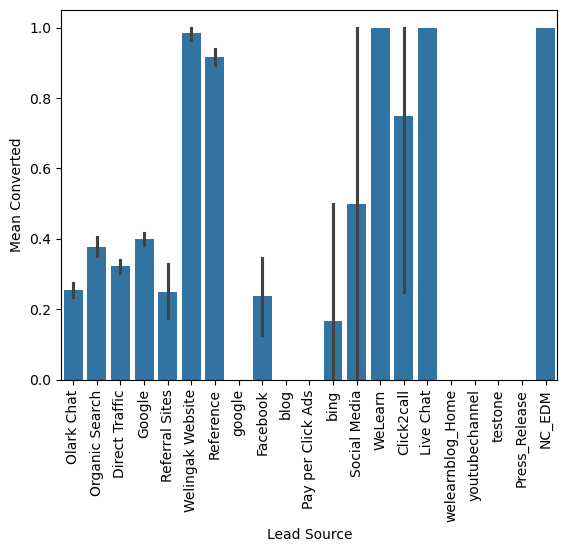

Value Converted Frequency Converted-Percentage
No         3443      8506                40.48
Yes         118       734                16.08


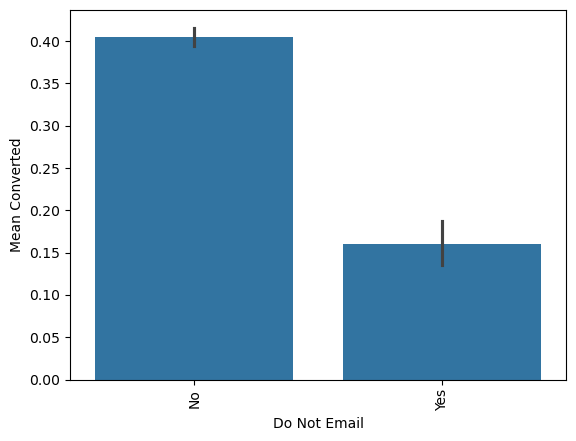

Value Converted Frequency Converted-Percentage
No         3559      9238                38.53
Yes           2         2                100.0


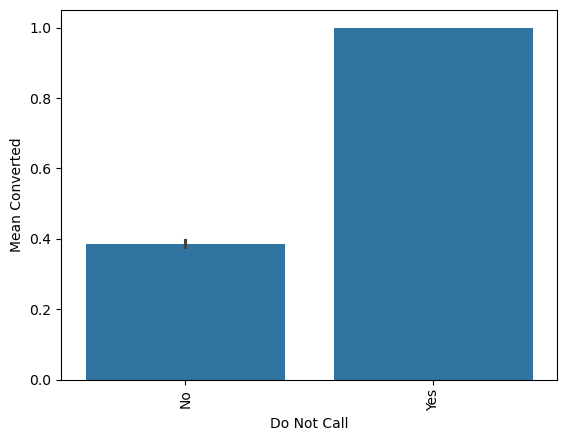

Value                        Converted Frequency Converted-Percentage
Page Visited on Website            151       640                23.59
Email Opened                      1253      3437                36.46
Unreachable                         31        93                33.33
Converted to Lead                   54       428                12.62
Olark Chat Conversation             84       973                 8.63
Email Bounced                       26       326                 7.98
Email Link Clicked                  73       267                27.34
Form Submitted on Website           28       116                24.14
Unsubscribed                        16        61                26.23
Had a Phone Conversation            22        30                73.33
View in browser link Clicked         1         6                16.67
Approached upfront                   9         9                100.0
SMS Sent                          1727      2745                62.91
Visited Booth in Tra

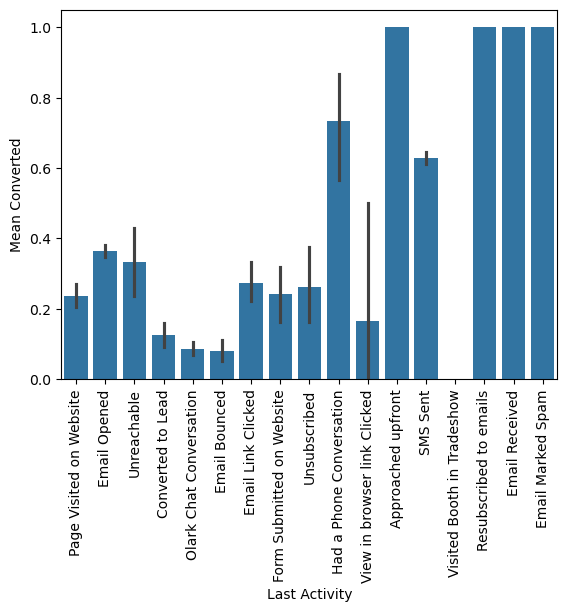

Value                Converted Frequency Converted-Percentage
India                     2401      6492                36.98
Russia                       0         1                  0.0
Kuwait                       0         4                  0.0
Oman                         3         6                 50.0
United Arab Emirates        20        53                37.74
United States               18        69                26.09
Australia                    3        13                23.08
United Kingdom               5        15                33.33
Bahrain                      4         7                57.14
Ghana                        0         2                  0.0
Singapore                   11        24                45.83
Qatar                        1        10                 10.0
Saudi Arabia                 4        21                19.05
Belgium                      0         2                  0.0
France                       3         6                 50.0
Sri Lank

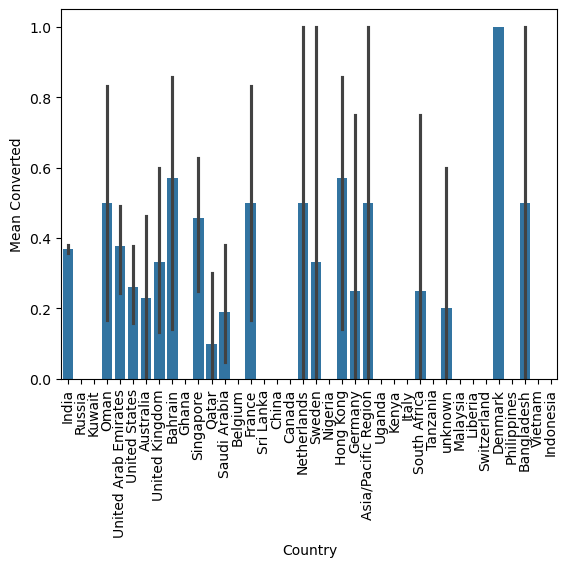

Value                             Converted Frequency Converted-Percentage
Business Administration                 179       403                44.42
Media and Advertising                    85       203                41.87
Supply Chain Management                 151       349                43.27
IT Projects Management                  140       366                38.25
Finance Management                      436       976                44.67
Travel and Tourism                       72       203                35.47
Human Resource Management               388       848                45.75
Marketing Management                    408       838                48.69
Banking, Investment And Insurance       167       338                49.41
International Business                   64       178                35.96
E-COMMERCE                               40       112                35.71
Operations Management                   238       503                47.32
Retail Management        

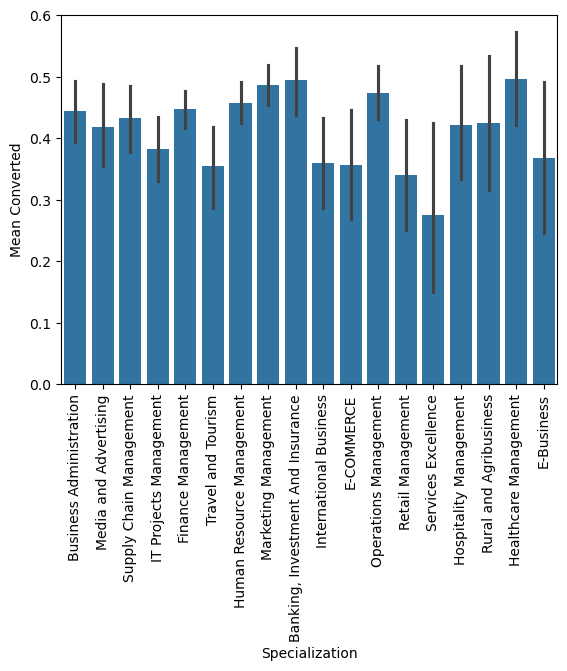

Value                 Converted Frequency Converted-Percentage
Word Of Mouth               152       348                43.68
Other                        75       186                40.32
Online Search               343       808                42.45
Multiple Sources             56       152                36.84
Advertisements               32        70                45.71
Student of SomeSchool       143       310                46.13
Email                        13        26                 50.0
Social Media                 28        67                41.79
SMS                           5        23                21.74
Null                       2714      7250                37.43


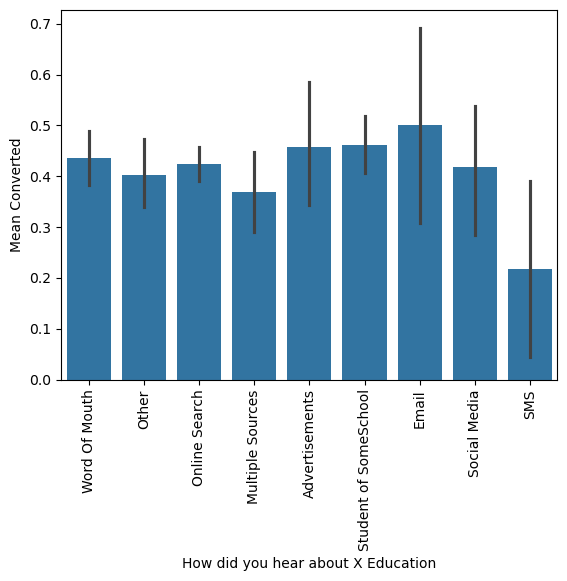

Value                Converted Frequency Converted-Percentage
Unemployed                2441      5600                43.59
Student                     78       210                37.14
Working Professional       647       706                91.64
Businessman                  5         8                 62.5
Other                       10        16                 62.5
Housewife                   10        10                100.0
Null                       370      2690                13.75


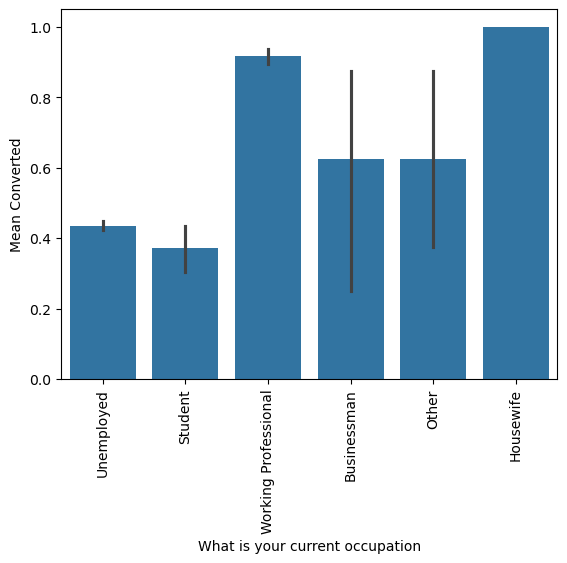

Value                     Converted Frequency Converted-Percentage
Better Career Prospects        3190      6528                48.87
Flexibility & Convenience         1         2                 50.0
Other                             0         1                  0.0
Null                            370      2709                13.66


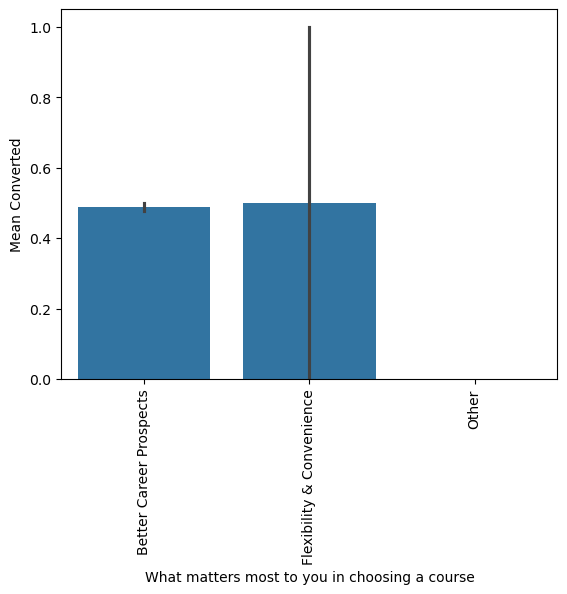

Value Converted Frequency Converted-Percentage
No         3556      9226                38.54
Yes           5        14                35.71


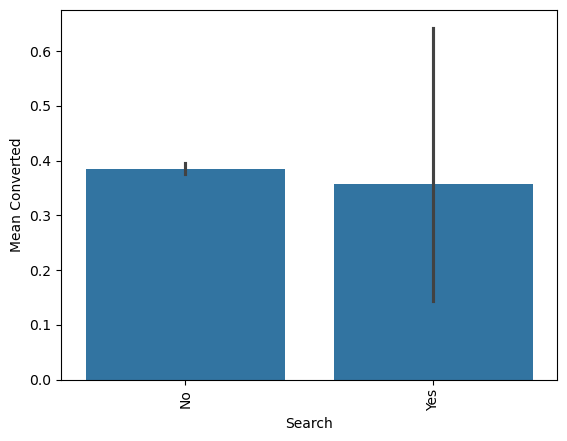

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


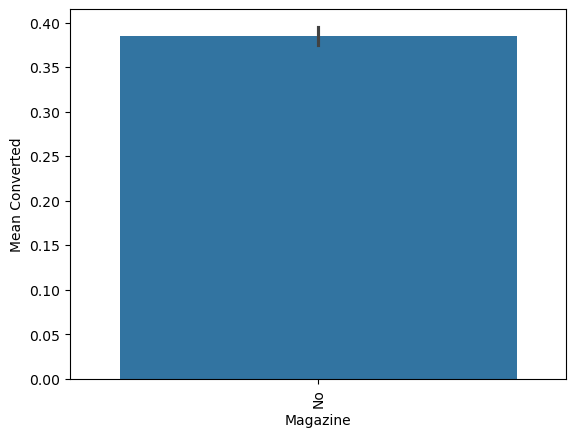

Value Converted Frequency Converted-Percentage
No         3560      9238                38.54
Yes           1         2                 50.0


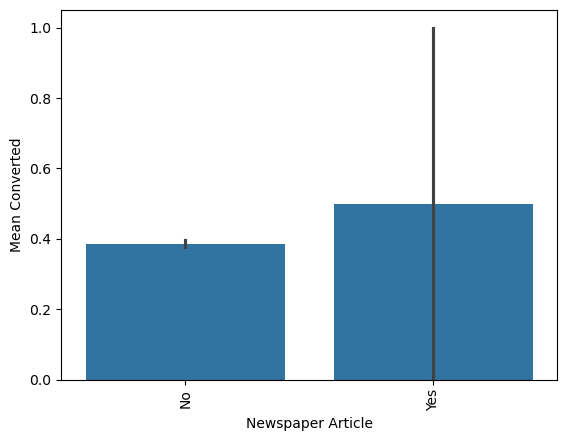

Value Converted Frequency Converted-Percentage
No         3561      9239                38.54
Yes           0         1                  0.0


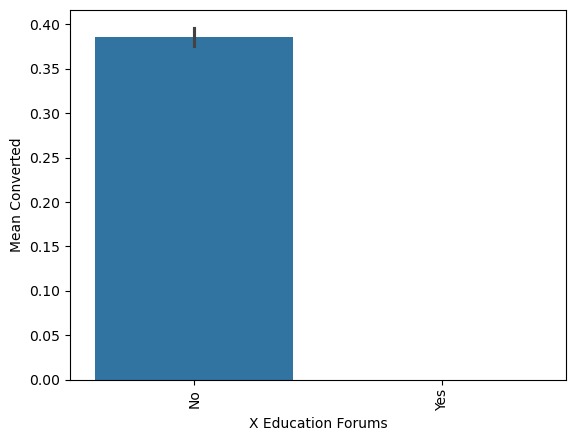

Value Converted Frequency Converted-Percentage
No         3561      9239                38.54
Yes           0         1                  0.0


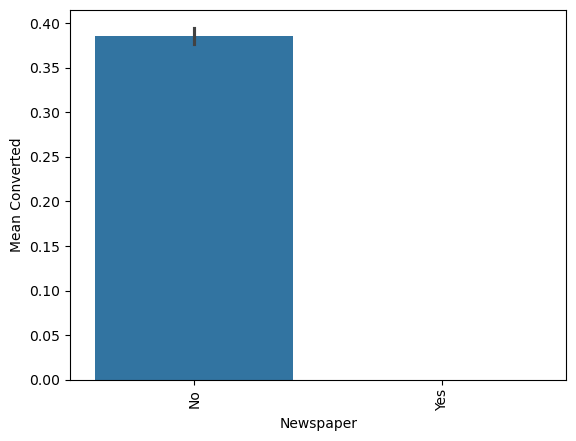

Value Converted Frequency Converted-Percentage
No         3560      9236                38.54
Yes           1         4                 25.0


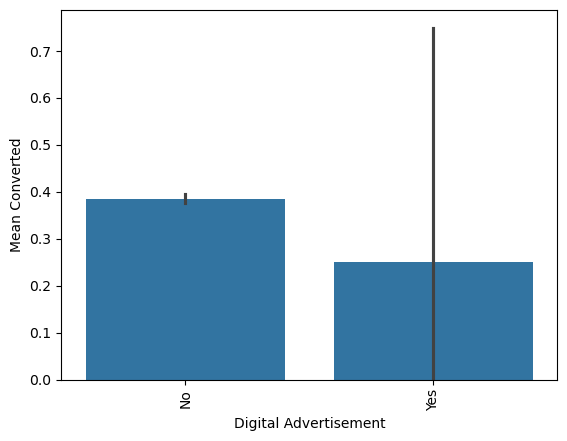

Value Converted Frequency Converted-Percentage
No         3556      9233                38.51
Yes           5         7                71.43


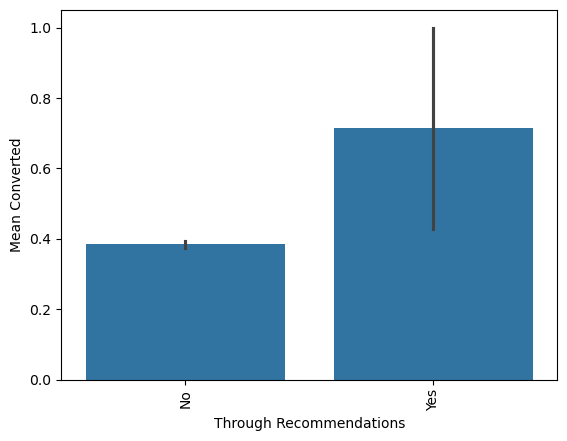

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


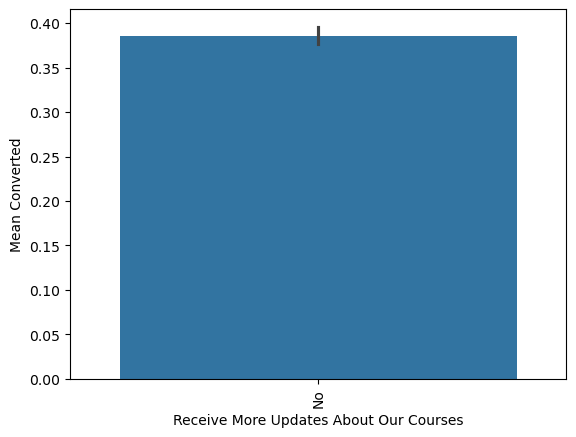

Value                                             Converted Frequency Converted-Percentage
Interested in other courses                              13       513                 2.53
Ringing                                                  34      1203                 2.83
Will revert after reading the email                    2007      2072                96.86
Lost to EINS                                            171       175                97.71
In confusion whether part time or DLP                     1         5                 20.0
Busy                                                    105       186                56.45
switched off                                              4       240                 1.67
in touch with EINS                                        3        12                 25.0
Already a student                                         3       465                 0.65
Diploma holder (Not Eligible)                             1        63                 1.59

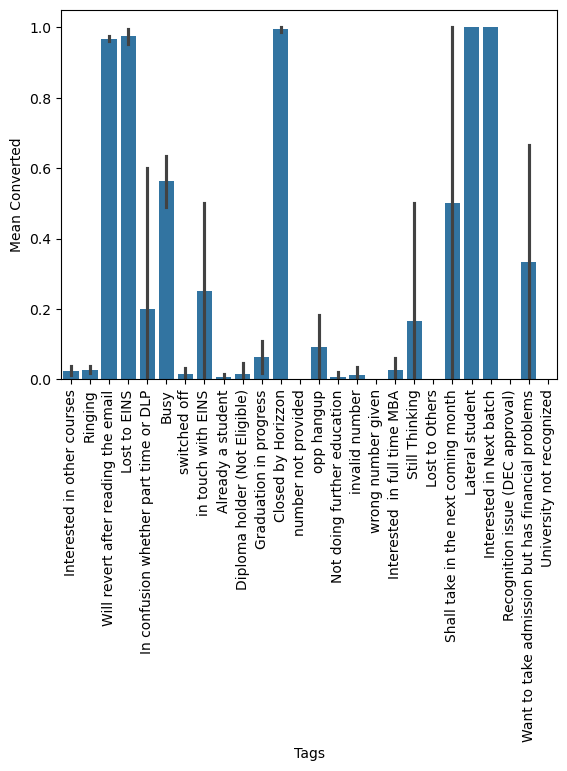

Value             Converted Frequency Converted-Percentage
Low in Relevance        477       583                81.82
Might be               1179      1560                75.58
Not Sure                266      1092                24.36
Worst                    12       601                  2.0
High in Relevance       603       637                94.66
Null                   1024      4767                21.48


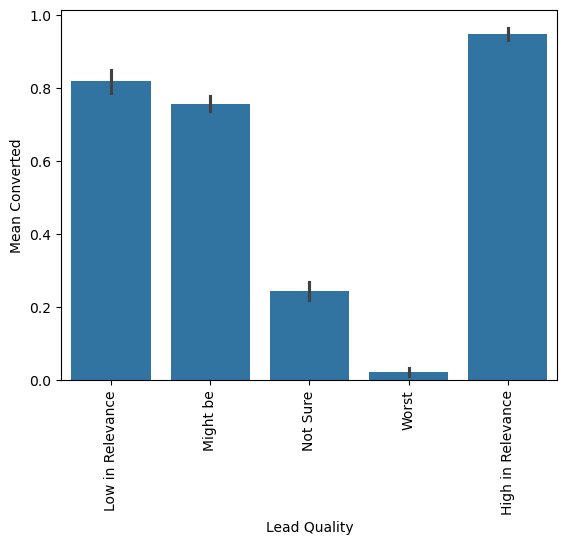

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


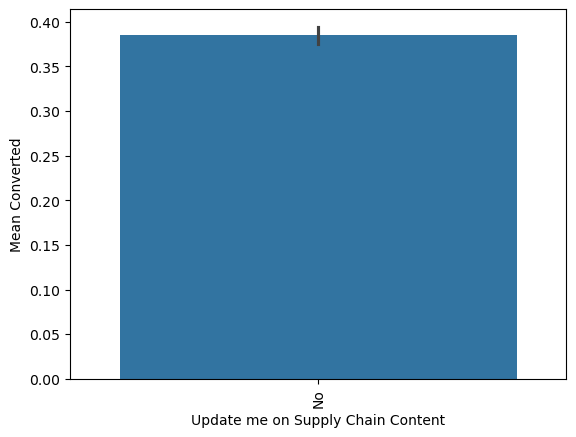

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


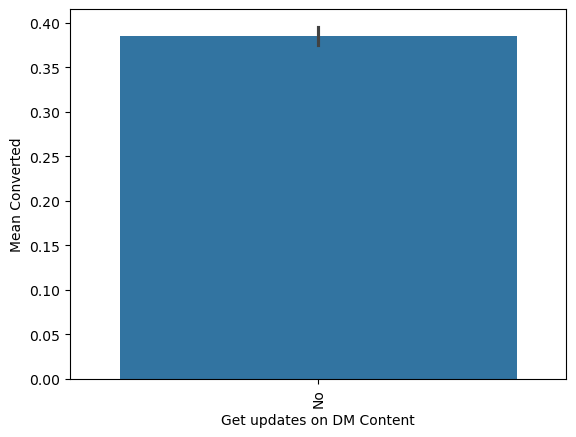

Value                       Converted Frequency Converted-Percentage
Potential Lead                   1267      1613                78.55
Other Leads                       180       487                36.96
Lateral Student                    23        24                95.83
Dual Specialization Student        20        20                100.0
Student of SomeSchool               9       241                 3.73
Null                             2062      6855                30.08


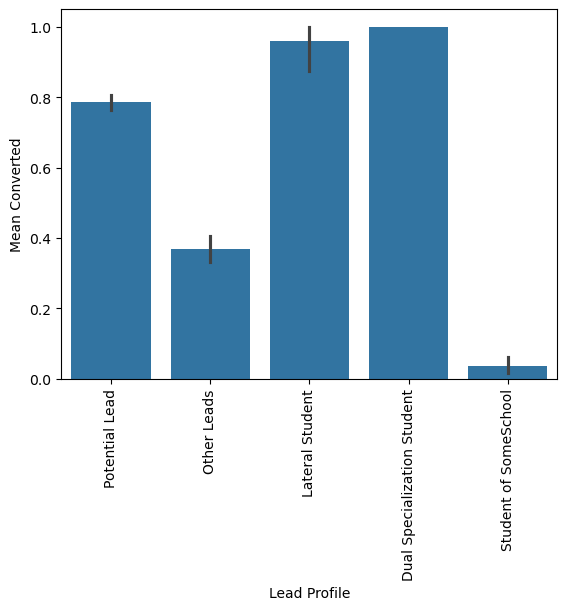

Value                       Converted Frequency Converted-Percentage
Mumbai                           1309      3222                40.63
Thane & Outskirts                 338       752                44.95
Other Metro Cities                155       380                40.79
Other Cities                      276       686                40.23
Other Cities of Maharashtra       201       457                43.98
Tier II Cities                     25        74                33.78
Null                             1257      3669                34.26


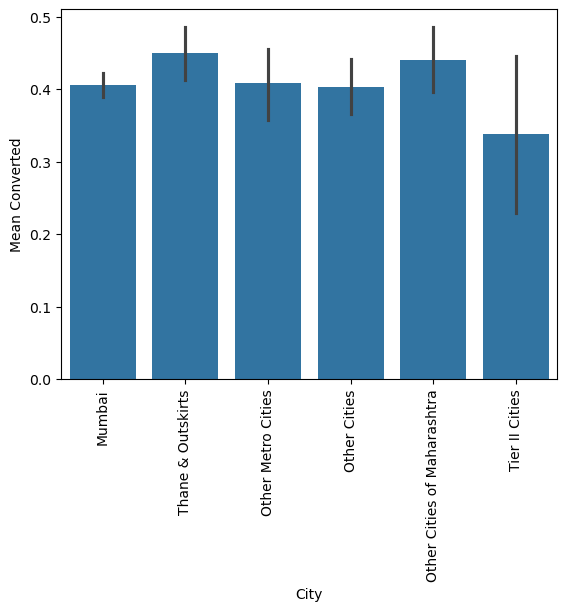

Value     Converted Frequency Converted-Percentage
02.Medium      1630      3839                42.46
01.High         245       821                29.84
03.Low           33       362                 9.12
Null           1653      4218                39.19


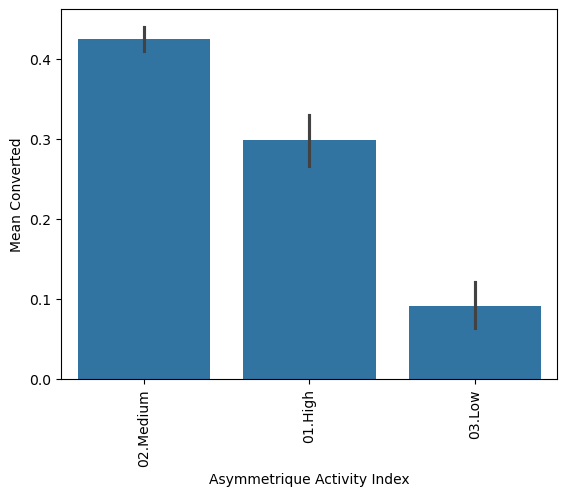

Value     Converted Frequency Converted-Percentage
02.Medium       848      2788                30.42
01.High        1045      2203                47.44
03.Low           15        31                48.39
Null           1653      4218                39.19


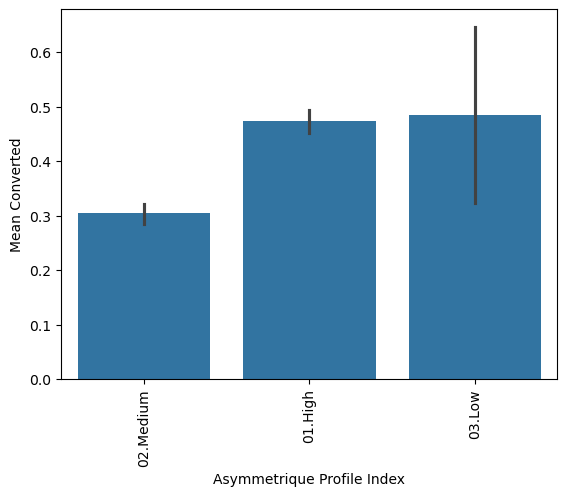

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


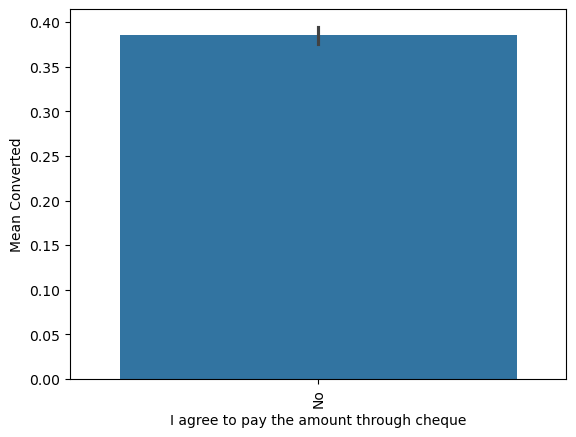

Value Converted Frequency Converted-Percentage
No         2531      6352                39.85
Yes        1030      2888                35.66


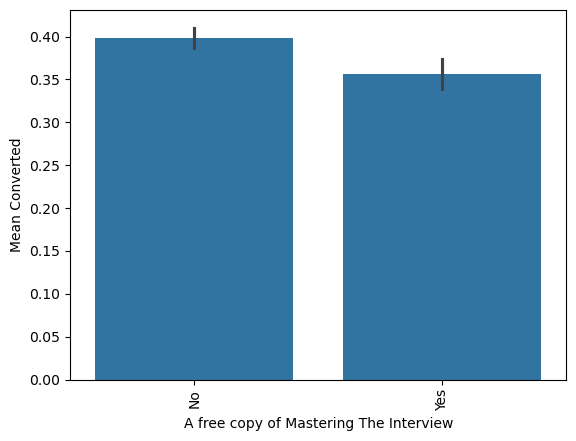

Value                        Converted Frequency Converted-Percentage
Modified                           783      3407                22.98
Email Opened                      1044      2827                36.93
Page Visited on Website             93       318                29.25
Email Bounced                        9        60                 15.0
Email Link Clicked                  45       173                26.01
Unreachable                         22        32                68.75
Unsubscribed                        14        47                29.79
Had a Phone Conversation            13        14                92.86
Olark Chat Conversation             25       183                13.66
SMS Sent                          1508      2172                69.43
Approached upfront                   1         1                100.0
Resubscribed to emails               1         1                100.0
View in browser link Clicked         0         1                  0.0
Form Submitted on We

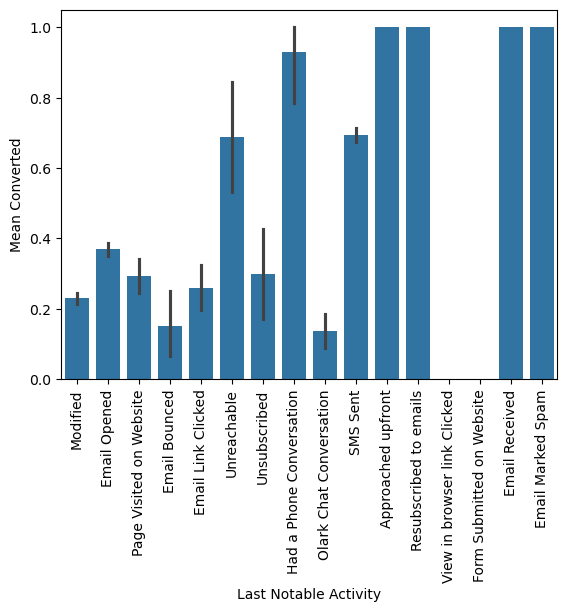

In [13]:
for column in cat_columns:
    check_categorical_column(column, df)

##### Observation
- "Lead Profile" has over 6800 nulls. We can't make any valueable inference from this information
- "What matters most to you in choosing a course" doesnt help much as most value is either "Better Career Prospects" which has 48% Converted percentage while all other is null.
- Few columns have low or zero variance, we will have to remove such columns.
- For "City" column, there are a lot of nulls and the rest of the columns have a very similar converted-percentage. This column can also be safely removed.
- "Country" column can also be removed as most students are from India and there's not enough data about other countries to make an inference.
- "How did you hear about X Education" has over 7000 nulls. It is better to remove this column before further processing
- Asymmetrique Profile and Activity Index also have high null value and very similar Converted-percentage value, so lets remove these columns too.
- "Lead Quality" and "Specialization" also has high null value but they also have high variance in converted-percentage. We will not remove these columns.
- Even though "Tags" have a high converted-percentage variance, from the business point of view, we will have to remove it as it contains data like "Already converted" or "Lost to EINS". It means this data is filled later and is not available when a lead comes in.

##### 2.1.2. Removing columns with high null values

In [14]:
df = df.drop(columns=["Lead Profile", "How did you hear about X Education", "City","What matters most to you in choosing a course", "Country", "Asymmetrique Profile Index", "Asymmetrique Activity Index", "Tags"], axis=1)

In [15]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                                51.590909
Asymmetrique Profile Score                  45.649351
Asymmetrique Activity Score                 45.649351
Specialization                              36.580087
What is your current occupation             29.112554
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Lead Origin                                  0.000000
Through Recommendations                      0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Newspaper Article                            0.000000
Digital Advertisement                        0.000000
Newspaper                   

##### 2.1.3. Removing columns with zero or low variance

In [16]:
description = df.describe(include="all")
threshold = 0.95 #if frequency of the most frequent value is 90% we will drop the column
columns_to_drop = []

for column in df.columns:
    if (
        "count" in description[column]
        and "freq" in description[column]
        and description[column]["freq"] / description[column]["count"] > threshold
    ):
        columns_to_drop.append(column)

print(columns_to_drop)

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [17]:
df = df.drop(columns=columns_to_drop, axis=1)

### 2.2. Numeric columns

In [18]:
def check_numeric_column(col_name, df):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('Values')
    plt.xticks(rotation=90)
    plt.show()

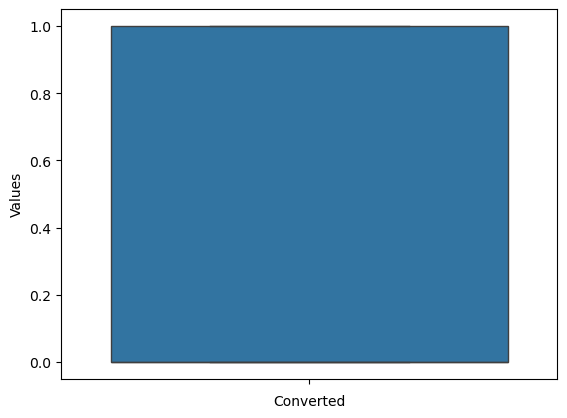

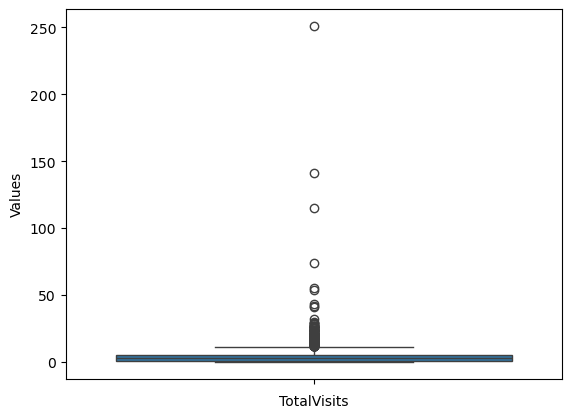

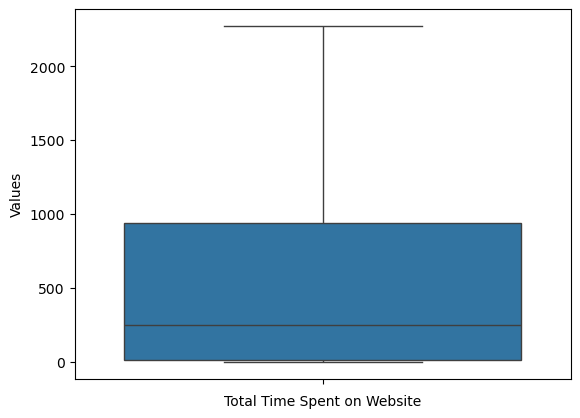

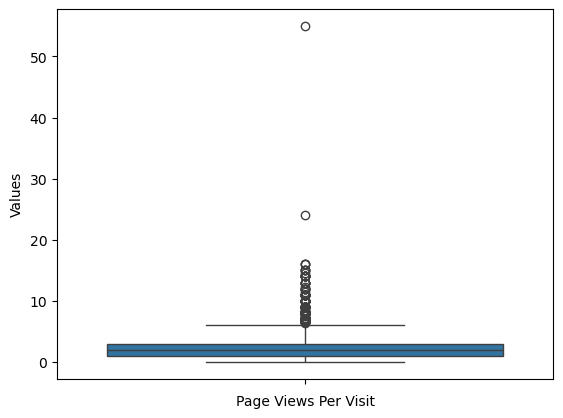

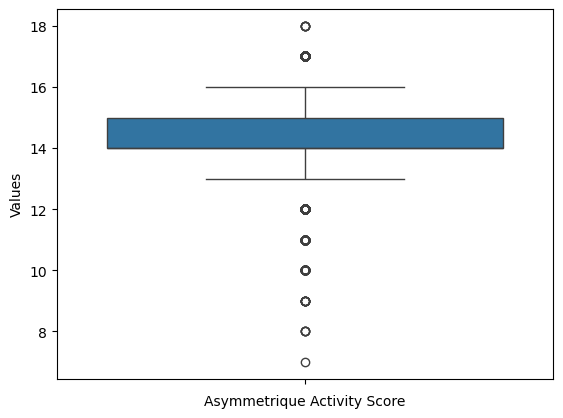

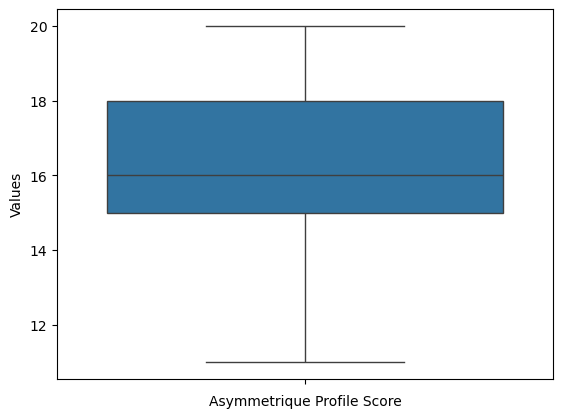

In [19]:
num_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()
for column in num_columns:
    check_numeric_column(column, df)

#### 2.2.1. Outlier Treatment

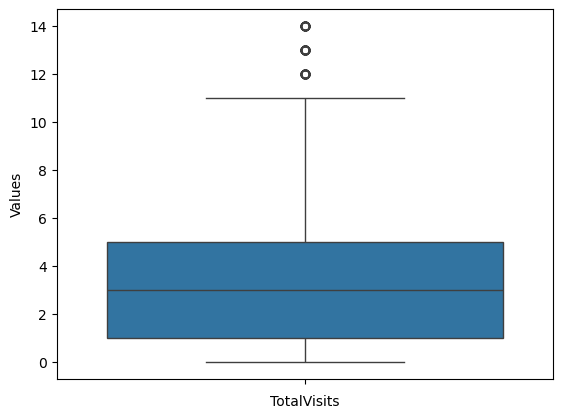

In [20]:
check_numeric_column("TotalVisits", df[df["TotalVisits"]<15])

In [21]:
df.loc[df["TotalVisits"]>11, "TotalVisits"] = 11

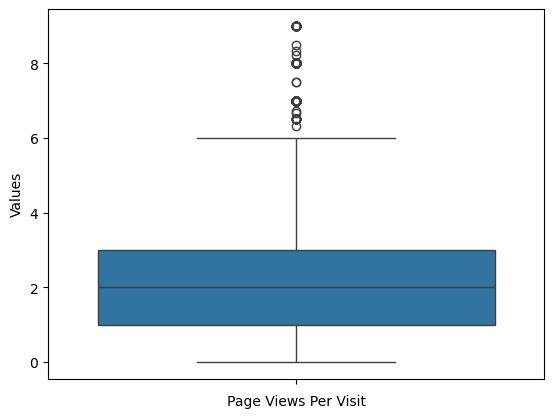

In [22]:
check_numeric_column("Page Views Per Visit", df[df["Page Views Per Visit"]<10])

In [23]:
df.loc[df["Page Views Per Visit"]>6, "Page Views Per Visit"] = 6

#### 2.2.2. Feature Engineering

Even though Assymetrique Scores have floating point value, they can be considered as catagorical column. Let's take a look on it using `checkCategoricalColumn()` function

Value Converted Frequency Converted-Percentage
 15.0       822      1293                63.57
 14.0       710      1771                40.09
 13.0        98       775                12.65
 17.0        17       349                 4.87
 16.0       228       467                48.82
 11.0         7        95                 7.37
 12.0        23       196                11.73
 10.0         3        57                 5.26
  9.0         0         9                  0.0
  8.0         0         4                  0.0
 18.0         0         5                  0.0
  7.0         0         1                  0.0
Null       1653      4218                39.19


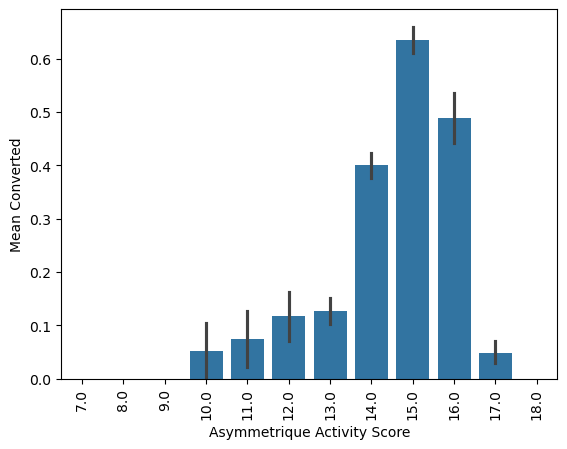

In [24]:
check_categorical_column("Asymmetrique Activity Score", df)

Value Converted Frequency Converted-Percentage
 15.0       500      1759                28.43
 20.0       218       308                70.78
 17.0       262       579                45.25
 18.0       383      1071                35.76
 14.0        57       226                25.22
 16.0       243       599                40.57
 13.0        48       204                23.53
 19.0       182       245                74.29
 12.0        10        22                45.45
 11.0         5         9                55.56
Null       1653      4218                39.19


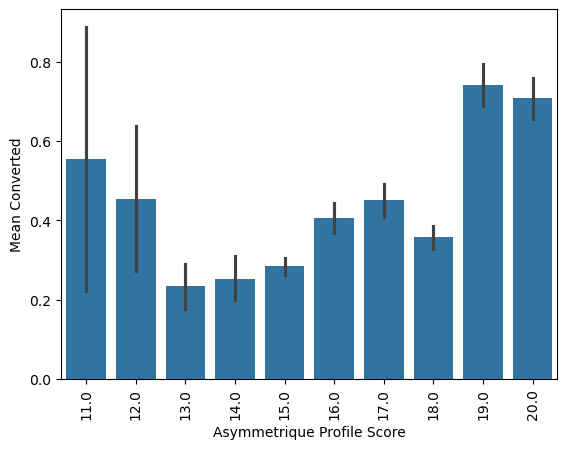

In [25]:
check_categorical_column("Asymmetrique Profile Score", df)

As we can see, in the "Asymmetrique Activity Score", higher is better except the last two values; however, in "Asymmetrique Profile Score", there's not much inference can be made. Let's add them and see how the resulting feature behaves.

In [26]:
df["Asymmetrique Score"] = df["Asymmetrique Profile Score"] + df["Asymmetrique Activity Score"]

Value Converted Frequency Converted-Percentage
 30.0       345       842                40.97
 34.0       214       298                71.81
 33.0       294       498                59.04
 32.0       293       917                31.95
 28.0        59       363                16.25
 29.0       208       725                28.69
 31.0       337       853                39.51
 26.0        12        98                12.24
 35.0        99       124                79.84
 27.0        31       229                13.54
 24.0         0         8                  0.0
 25.0         1        40                  2.5
 23.0         0         6                  0.0
 36.0        14        17                82.35
 20.0         0         1                  0.0
 21.0         0         1                  0.0
 37.0         1         2                 50.0
Null       1653      4218                39.19


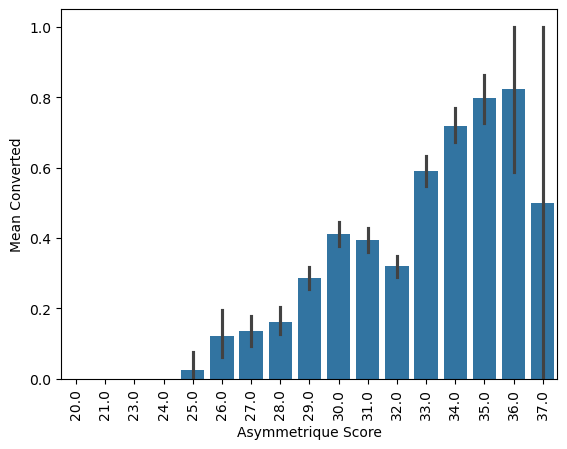

In [27]:
check_categorical_column("Asymmetrique Score", df)

The resulting column has a strong relation on higher value and high converted-percentage. We can remove the original columns.

In [28]:
df = df.drop(columns=["Asymmetrique Profile Score", "Asymmetrique Activity Score"], axis=1)

As for the null values, The Converted-percentage is very close to 31. Let's set null as 31

In [29]:
df["Asymmetrique Score"].fillna(value=31.0, inplace=True)

In [30]:
df.shape

(9240, 14)

In [31]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                              51.590909
Specialization                            36.580087
What is your current occupation           29.112554
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
Asymmetrique Score                         0.000000
dtype: float64

#### 2.2.3. Imputing Missing value

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
num_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()
((df[num_columns].isnull().sum()/df[num_columns].shape[0])*100).sort_values(ascending=False)

TotalVisits                    1.482684
Page Views Per Visit           1.482684
Converted                      0.000000
Total Time Spent on Website    0.000000
Asymmetrique Score             0.000000
dtype: float64

In [34]:
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

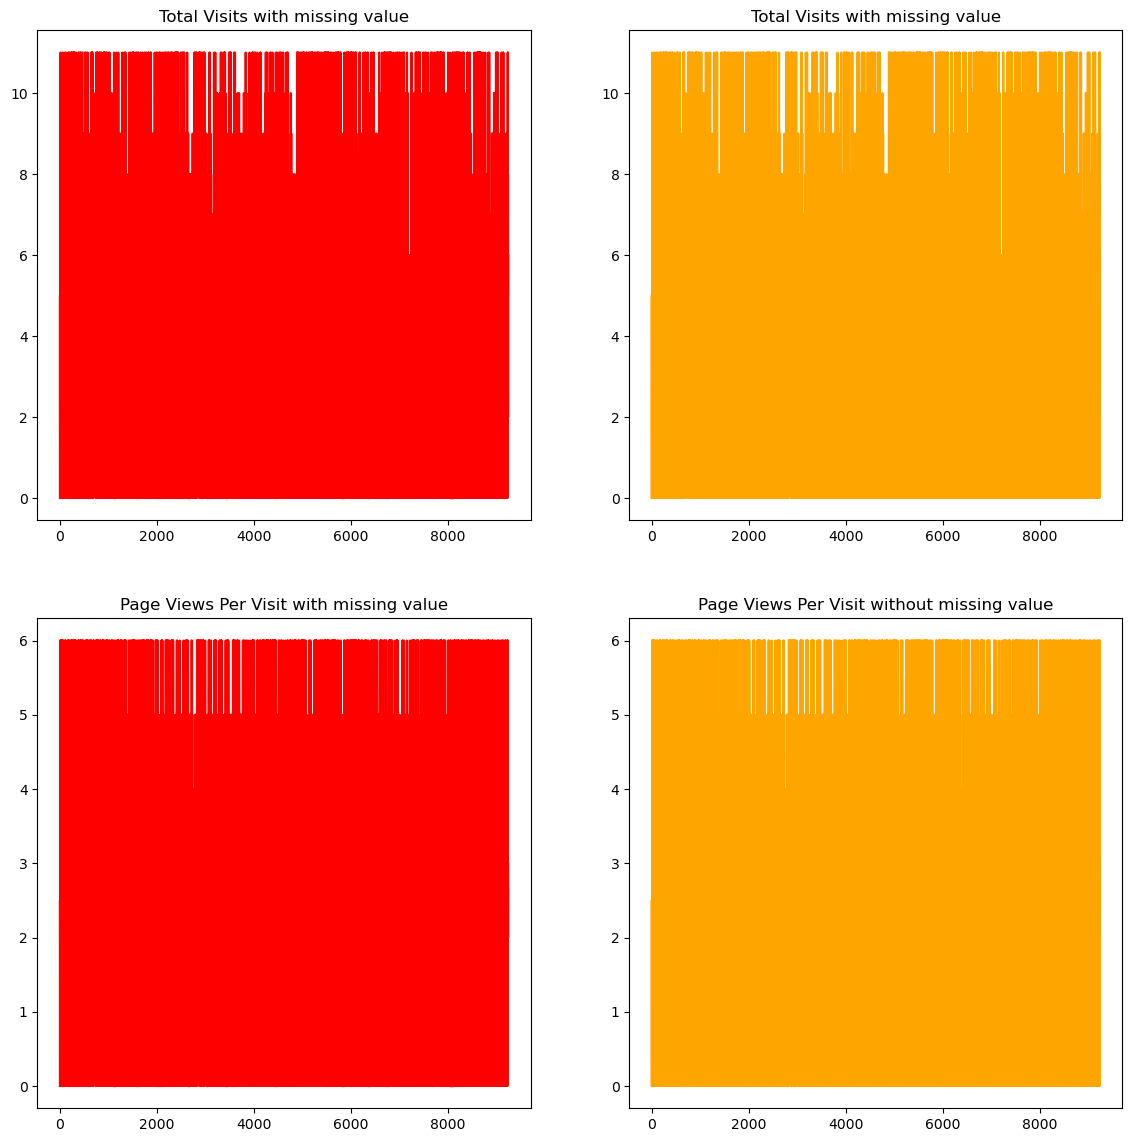

In [35]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title("Total Visits with missing value")
plt.plot(df["TotalVisits"], color='r')

df[["TotalVisits"]] = simple_imputer.fit_transform(df[["TotalVisits"]])
plt.subplot(222)
plt.title("Total Visits with missing value")
plt.plot(df["TotalVisits"], color='orange')

plt.subplot(223)
plt.title("Page Views Per Visit with missing value")
plt.plot(df["Page Views Per Visit"], color='r')

df[["Page Views Per Visit"]] = simple_imputer.fit_transform(df[["Page Views Per Visit"]])
plt.subplot(224)
plt.title("Page Views Per Visit without missing value")
plt.plot(df["Page Views Per Visit"], color='orange')

## 3. Dummy variables creation
We will create dummies in 2 steps. One for variables with high null values and another for variables with less or no nulls.

In [36]:
cat_columns = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
((df[cat_columns].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                              51.590909
Specialization                            36.580087
What is your current occupation           29.112554
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### 3.1. Variables with Null
Since these columns have high null value, we will treat null as its own category. To do that, we will keep all the values in a variable instead of dropping first using `drop_first=True`.

In [38]:
df_dummies = pd.get_dummies(df[["Specialization", "What is your current occupation", "Lead Quality", "Asymmetrique Score"]])

In [39]:
df_dummies.head()

,Asymmetrique Score,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,30.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,30.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,34.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,30.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,33.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [40]:
df_dummies.shape

(9240, 30)

### 3.2. Variables without Null
Here, we can drop the first value of each column to make our model a little more lightweight

In [41]:
df_dummies_2 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [42]:
df_dummies_2.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [43]:
df_dummies_2.shape

(9240, 57)

In [44]:
df = pd.concat(objs=[df, df_dummies, df_dummies_2], axis=1)

In [45]:
df = df.drop(columns=cat_columns.tolist(), axis=1)

In [46]:
df = df.drop("Asymmetrique Score", axis=1)

In [47]:
df.shape

(9240, 90)

## 4. Model Building and evaluation
Lets start with Test-Train split, build the model, and evaluate it.

### 4.1 Test-Train split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = df["Converted"]
X = df.drop("Converted", axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=400)

In [51]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (7392, 89)
y_train Size (7392,)


### 4.2 Scaling

In [52]:
from sklearn.preprocessing import PowerTransformer

In [53]:
scaler = PowerTransformer()

# scaling only the numeric variables

X_train_scaled = X_train
X_train_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Scaling test data using only `.tranform()` to use later

In [54]:
X_test_scaled = X_test
X_test_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])
X_test_scaled = X_test_scaled.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### 4.3 Building the model
Lets start with building a base model then try to tweak it as we go

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
# Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print("train data score", logreg.score(X_train_scaled, y_train))

# X_test_scaled = scaler.transform(X_test)
print("test data score", logreg.score(X_test_scaled, y_test))

train data score 0.8521374458874459
test data score 0.849025974025974


##### K-fold cross validation
K-Fold cross validation to make sure there's no data leak

In [57]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.85945946 0.84864865 0.87567568 0.8972973  0.84864865 0.81621622
 0.83783784 0.83783784 0.83695652 0.83695652]
Avg : 0.8495534665099882


##### Precision and recall

In [58]:
predicted = logreg.predict(X_test_scaled)
print("confusion matrix")
print(confusion_matrix(y_test, predicted))
print("Classification report")
print(classification_report(y_test, predicted))

confusion matrix
[[1030  116]
 [ 163  539]]
Classigication report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1146
           1       0.82      0.77      0.79       702

    accuracy                           0.85      1848
   macro avg       0.84      0.83      0.84      1848
weighted avg       0.85      0.85      0.85      1848



Our baseline model has a very high accuracy but recall is not good. We can fix this by later by selecting appropriate threshold. For now, lets work on making the model a little more lightweight by removing the features that we don't need.

In [59]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
rfe = RFE(logreg, n_features_to_select=20) #RFE with 20 variables as output 
rfe = rfe.fit(X_train_scaled, y_train)

In [61]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Specialization_Banking, Investment And Insurance', False, 41),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 62),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 60),
 ('Specialization_Hospitality Management', False, 56),
 ('Specialization_Human Resource Management', False, 47),
 ('Specialization_IT Projects Management', False, 46),
 ('Specialization_International Business', False, 66),
 ('Specialization_Marketing Management', False, 38),
 ('Specialization_Media and Advertising', False, 44),
 ('Specialization_Operations Management', False, 45),
 ('Specialization_Retail Management', False, 49),
 ('Specialization_Rural and Agribusiness', False, 21),
 ('Specialization_Services Excellence', False, 33),
 ('Specialization_Supply Chain Manag

In [62]:
col = X_train.columns[rfe.support_].tolist()
col

['Total Time Spent on Website',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Working Professional',
 'Lead Quality_High in Relevance',
 'Lead Quality_Low in Relevance',
 'Lead Quality_Might be',
 'Lead Quality_Worst',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Email Opened',
 'Last Activity_Resubscribed to emails',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Resubscribed to emails']

In [63]:
X_train_rfe = X_train_scaled[col].astype(float)

In [64]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total Time Spent on Website                           7392 non-null   float64
 1   What is your current occupation_Housewife             7392 non-null   float64
 2   What is your current occupation_Other                 7392 non-null   float64
 3   What is your current occupation_Working Professional  7392 non-null   float64
 4   Lead Quality_High in Relevance                        7392 non-null   float64
 5   Lead Quality_Low in Relevance                         7392 non-null   float64
 6   Lead Quality_Might be                                 7392 non-null   float64
 7   Lead Quality_Worst                                    7392 non-null   float64
 8   Lead Origin_Lead Add Form                             7392

In [65]:
X_train_sm = sm.add_constant(X_train_rfe)

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.8
Date:                Tue, 26 Dec 2023   Deviance:                       5169.6
Time:                        21:40:43   Pearson chi2:                 7.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4702
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2338      0.123    -18.219      0.000      -2.474      -1.993
Total Time Spent on Website                              1.3783      0.059     23.413      0.000       1.263       1.494
What is your current occupation_Housewife               21.6576   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Other                    1.3504      1.166      1.158      0.247      -0.935       3.636
What is your current occupation_Working Professional     1.8150      0.198      9.145      0.000       1.426       2.204
Lead Quality_High in Relevance                           3.8536      0.221     17.438      0.000       3.420       4.287
Lead Quality_Low in Relevance                            2.6785      0.151     17.693      0.000       2.382       2.975
Lead Quality_Might be                                    1.6307      0.094     17.300      0.000       1.446       1.815
Lead Quality_Worst                                      -2.0377      0.336     -6.059      0.000      -2.697      -1.379
Lead Origin_Lead Add Form                                3.7683      0.224     16.808      0.000       3.329       4.208
Lead Source_Olark Chat                                   2.6527      0.146     18.150      0.000       2.366       2.939
Lead Source_Welingak Website                             3.7503      0.748      5.015      0.000       2.284       5.216
Do Not Email_Yes                                        -1.0204      0.175     -5.833      0.000      -1.363      -0.677
Last Activity_Email Opened                               0.9694      0.164      5.896      0.000       0.647       1.292
Last Activity_Resubscribed to emails                    12.0973   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.4724      0.112     13.095      0.000       1.252       1.693
Last Notable Activity_Email Opened                      -0.9168      0.186     -4.941      0.000      -1.281      -0.553
Last Notable Activity_Had a Phone Conversation           2.0806      1.211      1.719      0.086      -0.292       4.453
Last Notable Activity_Modified                          -1.1309      0.110    -10.327      0.000      -1.346      -0.916
Last Notable Activity_Olark Chat Conversation           -1.3319      0.345     -3.866      0.000      -2.007      -0.657
Last Notable Activity_Resubscribed to emails            12.0973   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
========================================================================================================================
"""

In [66]:
def checkVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [67]:
checkVIF(X_train_sm.astype(int))

                                                Features    VIF
20          Last Notable Activity_Resubscribed to emails    inf
14                  Last Activity_Resubscribed to emails    inf
0                                                  const  11.40
16                    Last Notable Activity_Email Opened   6.23
13                            Last Activity_Email Opened   4.74
18                        Last Notable Activity_Modified   2.31
15                                Last Activity_SMS Sent   2.22
1                            Total Time Spent on Website   2.02
10                                Lead Source_Olark Chat   1.91
9                              Lead Origin_Lead Add Form   1.78
7                                  Lead Quality_Might be   1.37
11                          Lead Source_Welingak Website   1.29
4   What is your current occupation_Working Professional   1.24
5                         Lead Quality_High in Relevance   1.21
19         Last Notable Activity_Olark C

Here, we will check and remove columns that have either high p value or a high VIF or both. Lets remove them one at a time.

In [68]:
def trainAndCheckVIF(df=X_train_sm):
    logm2 = sm.GLM(y_train, df, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    checkVIF(df)

In [69]:
X_train_sm = X_train_sm.drop("Last Notable Activity_Resubscribed to emails", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.8
Date:                Tue, 26 Dec 2023   Deviance:                       5169.6
Time:                        21:40:44   Pearson chi2:                 7.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4702
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [70]:
X_train_sm = X_train_sm.drop("Last Activity_Resubscribed to emails", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.6
Date:                Tue, 26 Dec 2023   Deviance:                       5173.2
Time:                        21:40:44   Pearson chi2:                 7.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4699
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [71]:
X_train_sm = X_train_sm.drop("What is your current occupation_Housewife", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.7
Date:                Tue, 26 Dec 2023   Deviance:                       5179.3
Time:                        21:40:44   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4695
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [72]:
X_train_sm = X_train_sm.drop("What is your current occupation_Other", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 26 Dec 2023   Deviance:                       5180.6
Time:                        21:40:44   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4694
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [73]:
X_train_sm = X_train_sm.drop("Last Notable Activity_Had a Phone Conversation", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 26 Dec 2023   Deviance:                       5184.6
Time:                        21:40:44   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4691
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

As you can see, we have eliminated all the columns with high p or VIF values. we can go ahead and evaluate the model now.

### 4.4 Model Evaluation

Let's get the final model for evalutation

In [74]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [75]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 7392 non-null   float64
 1   Total Time Spent on Website                           7392 non-null   float64
 2   What is your current occupation_Working Professional  7392 non-null   float64
 3   Lead Quality_High in Relevance                        7392 non-null   float64
 4   Lead Quality_Low in Relevance                         7392 non-null   float64
 5   Lead Quality_Might be                                 7392 non-null   float64
 6   Lead Quality_Worst                                    7392 non-null   float64
 7   Lead Origin_Lead Add Form                             7392 non-null   float64
 8   Lead Source_Olark Chat                                7392

In [76]:
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 26 Dec 2023   Deviance:                       5184.6
Time:                        21:40:44   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4691
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1942      0.121    -18.120      0.000      -2.432      -1.957
Total Time Spent on Website                              1.3735      0.059     23.399      0.000       1.258       1.489
What is your current occupation_Working Professional     1.7989      0.198      9.070      0.000       1.410       2.188
Lead Quality_High in Relevance                           3.8700      0.221     17.523      0.000       3.437       4.303
Lead Quality_Low in Relevance                            2.7111      0.151     17.971      0.000       2.415       3.007
Lead Quality_Might be                                    1.6447      0.094     17.488      0.000       1.460       1.829
Lead Quality_Worst                                      -2.0191      0.335     -6.032      0.000      -2.675      -1.363
Lead Origin_Lead Add Form                                3.7639      0.224     16.817      0.000       3.325       4.203
Lead Source_Olark Chat                                   2.6421      0.146     18.131      0.000       2.356       2.928
Lead Source_Welingak Website                             3.7462      0.748      5.010      0.000       2.281       5.212
Do Not Email_Yes                                        -1.0375      0.175     -5.930      0.000      -1.380      -0.695
Last Activity_Email Opened                               0.9506      0.164      5.795      0.000       0.629       1.272
Last Activity_SMS Sent                                   1.4374      0.111     12.912      0.000       1.219       1.656
Last Notable Activity_Email Opened                      -0.9347      0.185     -5.049      0.000      -1.298      -0.572
Last Notable Activity_Modified                          -1.1507      0.109    -10.568      0.000      -1.364      -0.937
Last Notable Activity_Olark Chat Conversation           -1.3685      0.344     -3.978      0.000      -2.043      -0.694
========================================================================================================================
"""

In [77]:
y_train_pred = model.predict(sm.add_constant(X_train_sm))
y_train_pred.head()

0    0.131774
1    0.208338
2    0.034475
3    0.916892
4    0.226768
dtype: float64

#### 4.4.1 Accuracy and related matrix

In [78]:
y_train_pred_final = pd.DataFrame({"Actual":y_train.values, "Probability":y_train_pred})

Let's take 0.5 as threshold for now. We will find a better threshold in a bit.

In [79]:
y_train_pred_final["Predicted"] = y_train_pred_final["Probability"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual,Probability,Predicted
0,0,0.131774,0
1,0,0.208338,0
2,0,0.034475,0
3,1,0.916892,1
4,1,0.226768,0


In [80]:
X_test_rfe = X_test_scaled[X_train_sm.columns[1:]].astype(float) #remove const
X_test_sm = sm.add_constant(X_test_rfe)
X_test_sm = X_test_sm.reset_index(drop=True)

In [81]:
print(X_train_sm.shape)
print(X_test_sm.shape)

(7392, 16)
(1848, 16)


In [82]:
y_test_pred = model.predict(X_test_sm)

In [83]:
y_test_pred_final = pd.DataFrame({"Actual":y_test.values, "Probability":y_test_pred})
y_test_pred_final["Predicted"] = y_test_pred_final["Probability"].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Actual,Probability,Predicted
0,0,0.709464,1
1,0,0.171300,0
2,1,0.621138,1
3,1,0.280416,0
4,0,0.516784,1


In [84]:
confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final["Predicted"] )

array([[4149,  384],
       [ 756, 2103]])

In [85]:
confusion_matrix(y_test_pred_final["Actual"], y_test_pred_final["Predicted"] )

array([[1040,  106],
       [ 186,  516]])

In [86]:
train_accuracy = accuracy_score(y_train_pred_final["Actual"], y_train_pred_final["Predicted"])
test_accuracy = accuracy_score(y_test_pred_final["Actual"], y_test_pred_final["Predicted"])
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Train accuracy 0.8457792207792207
Test accuracy 0.841991341991342


#### 4.4.2 Metrics beyond simply accuracy

In [87]:
confusion = confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final["Predicted"] )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7355718782791185

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.9152878888153541

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08471211118464593


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.8455971049457177


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8458715596330275


In [93]:
print("Train", classification_report(y_train_pred_final["Actual"], y_train_pred_final["Predicted"]))
print("Test", classification_report(y_test_pred_final["Actual"], y_test_pred_final["Predicted"]))

Train               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4533
           1       0.85      0.74      0.79      2859

    accuracy                           0.85      7392
   macro avg       0.85      0.83      0.83      7392
weighted avg       0.85      0.85      0.84      7392

Test               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1146
           1       0.83      0.74      0.78       702

    accuracy                           0.84      1848
   macro avg       0.84      0.82      0.83      1848
weighted avg       0.84      0.84      0.84      1848



#### 4.4.3 Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [95]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final["Actual"], y_train_pred_final["Probability"], drop_intermediate=False)

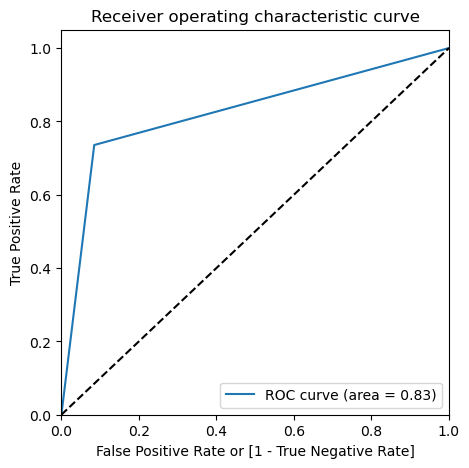

In [122]:
draw_roc(y_train_pred_final["Actual"], y_train_pred_final["Predicted"])

### 4.5. Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Probability"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.131774,0,1,1,0,0,0,0,0,0,0,0
1,0,0.208338,0,1,1,1,0,0,0,0,0,0,0
2,0,0.034475,0,1,0,0,0,0,0,0,0,0,0
3,1,0.916892,1,1,1,1,1,1,1,1,1,1,1
4,1,0.226768,0,1,1,1,0,0,0,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386769  1.000000  0.000000
0.1   0.1  0.683442  0.970269  0.502537
0.2   0.2  0.808847  0.908010  0.746305
0.3   0.3  0.830898  0.872683  0.804544
0.4   0.4  0.844291  0.808674  0.866755
0.5   0.5  0.845779  0.735572  0.915288
0.6   0.6  0.843885  0.706541  0.930510
0.7   0.7  0.828734  0.638685  0.948599
0.8   0.8  0.803030  0.531654  0.974189
0.9   0.9  0.771916  0.433019  0.985661


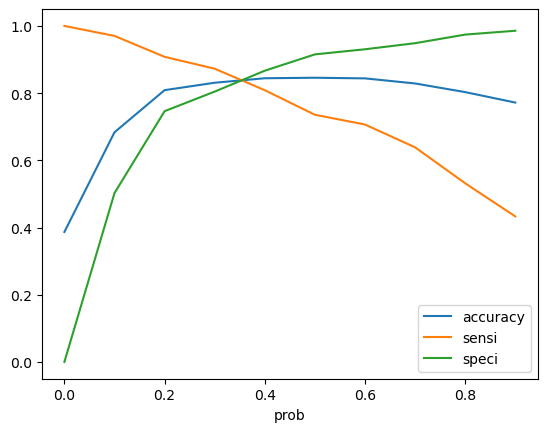

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Probability"].map( lambda x: 1 if x > 0.4 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final["Probability"].map( lambda x: 1 if x > 0.4 else 0)

In [101]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final["Actual"], y_train_pred_final['final_predicted'])

0.8442911255411255

In [102]:
confusion2 = confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final["final_predicted"] )
confusion2

array([[3929,  604],
       [ 547, 2312]])

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Precision and Recall

##### Precision
TP / TP + FP

In [104]:
TP / (TP + FP)

0.7928669410150891

##### Recall
TP / TP + FN

In [105]:
TP / (TP + FN)

0.8086743616649178

In [106]:
print("Train", classification_report(y_train_pred_final["Actual"], y_train_pred_final["final_predicted"]))
print("Test", classification_report(y_test_pred_final["Actual"], y_test_pred_final["final_predicted"]))

Train               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4533
           1       0.79      0.81      0.80      2859

    accuracy                           0.84      7392
   macro avg       0.84      0.84      0.84      7392
weighted avg       0.84      0.84      0.84      7392

Test               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1146
           1       0.79      0.82      0.80       702

    accuracy                           0.85      1848
   macro avg       0.84      0.84      0.84      1848
weighted avg       0.85      0.85      0.85      1848



##### Precision and recall tradeoff

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
y_train_pred_final["Actual"], y_train_pred_final["final_predicted"]

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 7387    0
 7388    0
 7389    0
 7390    1
 7391    1
 Name: Actual, Length: 7392, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 7387    0
 7388    0
 7389    0
 7390    1
 7391    0
 Name: final_predicted, Length: 7392, dtype: int64)

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Actual"], y_train_pred_final["Probability"])

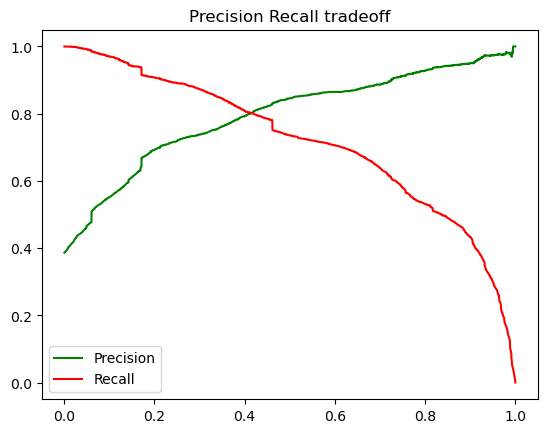

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(["Precision", "Recall"])
plt.title("Precision Recall tradeoff")
plt.show()

## 5. Making predictions on data set

Let's save the model so we can use this model instead of having to run the whole notebook.

### 5.1. Saving important variables

In [111]:
# Check if joblib is installed
try:
    import joblib
except ImportError:
    # If not found, install joblib
    !pip install joblib
    # Import joblib after installation
    import joblib

In [112]:
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(simple_imputer, 'simple_imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### 5.2. Calculate probability
To calculate probability, we just need to run the code below and use the already trained model

In [113]:
import numpy as np
import pandas as pd

In [114]:
def get_probablity(data):
    import joblib
    import statsmodels.api as sm

    # import important variables
    model = joblib.load('logistic_regression_model.pkl')
    simple_imputer = joblib.load('simple_imputer.pkl')
    scaler = joblib.load('scaler.pkl')
    
    df = data
    df = df.replace('Select', np.NaN) # removing "select" from the data
    
    # remove columns that had high null values
    df = df.drop(columns=["Lead Profile", "How did you hear about X Education", "City","What matters most to you in choosing a course", 
                          "Country", "Asymmetrique Profile Index", "Asymmetrique Activity Index", "Tags"], axis=1)
    
    # remove columns that had low or zero variance
    df = df.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                          'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                          'Update me on Supply Chain Content', 'Get updates on DM Content', 
                          'I agree to pay the amount through cheque'], axis=1)
    
    # outlier treatment
    df.loc[df["TotalVisits"]>11, "TotalVisits"] = 11
    df.loc[df["Page Views Per Visit"]>6, "Page Views Per Visit"] = 6
    
    # feature engineering
    df["Asymmetrique Score"] = df["Asymmetrique Profile Score"] + df["Asymmetrique Activity Score"]
    df["Asymmetrique Score"].fillna(value=31.0, inplace=True)
    df = df.drop(columns=["Asymmetrique Profile Score", "Asymmetrique Activity Score"], axis=1)

    # imputing missing values
    df[["TotalVisits"]] = simple_imputer.fit_transform(df[["TotalVisits"]])
    df[["Page Views Per Visit"]] = simple_imputer.fit_transform(df[["Page Views Per Visit"]])

    # Dummy variables
    df_dummies = pd.get_dummies(df[["Specialization", "What is your current occupation", "Lead Quality", "Asymmetrique Score"]])
    df_dummies_2 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                                      'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
    df = pd.concat(objs=[df, df_dummies, df_dummies_2], axis=1)
    df = df.drop(columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 
                          'What is your current occupation', 'Lead Quality', 'A free copy of Mastering The Interview', 
                          'Last Notable Activity', 'Asymmetrique Score'], axis=1)
    
    # scaling
    df[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(df[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])
    
    # getting the final columns
    df = df[model.params.index.tolist()[1:]] # get all columns except const
    
    # prediction
    data["Lead Score"] = round(model.predict(sm.add_constant(df.astype(float)))*100, 2)
    return data

In [115]:
data = pd.read_csv("Leads.csv")
data = get_probablity(data)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,49.20
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,23.42
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,77.95
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,4.76
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,50.54


X Education can now use this dataset or feed new data and the above code will generate a new column called `Lead Score` with probability ranging from 0 to 100. 

According to the results we got, Lead with a `Lead Score` value of more than `40` is a Hot lead. This cut-off score can be altered by the organization depending on their goals. If they want to target a larger number of leads, they can decrease the cut-off or if they want to focus their man-power on leads that are most likely to convert, they can increase the cut-off accordingly.

### Subjective questions

In [117]:
model = joblib.load('logistic_regression_model.pkl')
model.params.abs().sort_values(ascending=False)

Lead Quality_High in Relevance                          3.870043
Lead Origin_Lead Add Form                               3.763926
Lead Source_Welingak Website                            3.746172
Lead Quality_Low in Relevance                           2.711102
Lead Source_Olark Chat                                  2.642052
const                                                   2.194213
Lead Quality_Worst                                      2.019136
What is your current occupation_Working Professional    1.798890
Lead Quality_Might be                                   1.644677
Last Activity_SMS Sent                                  1.437442
Total Time Spent on Website                             1.373488
Last Notable Activity_Olark Chat Conversation           1.368458
Last Notable Activity_Modified                          1.150666
Do Not Email_Yes                                        1.037533
Last Activity_Email Opened                              0.950591
Last Notable Activity_Ema

In [118]:
model.params

const                                                  -2.194213
Total Time Spent on Website                             1.373488
What is your current occupation_Working Professional    1.798890
Lead Quality_High in Relevance                          3.870043
Lead Quality_Low in Relevance                           2.711102
Lead Quality_Might be                                   1.644677
Lead Quality_Worst                                     -2.019136
Lead Origin_Lead Add Form                               3.763926
Lead Source_Olark Chat                                  2.642052
Lead Source_Welingak Website                            3.746172
Do Not Email_Yes                                       -1.037533
Last Activity_Email Opened                              0.950591
Last Activity_SMS Sent                                  1.437442
Last Notable Activity_Email Opened                     -0.934675
Last Notable Activity_Modified                         -1.150666
Last Notable Activity_Ola

Q 1. Top three variable contrinuting towards lead conversion

Ans. The top 3 variables are 
- Lead Quality_High in Relevance
- Lead Origin_Lead Add Form
- Lead Source_Welingak Website

Q 2. Top 3 categorical/dummy variables in the model

Ans. Top 3 Categories are 
- Lead Quality
- Lead Origin
- Lead Source

Q 3. Strategy to employ when X Education has more man-power to target as many people as they can

Ans. When X Education has more man-power, they can decrease the cut-off from 40 to something like 35 or even 30 so the pool of possible leads increases.
The code to show all leads with a `Lead Score` value of more than 30 is 
`data[data["Lead Score"]>30]`

Q 4. Strategy to employ when X Education wants to reduce man-power on the leads.

Ans. When X Education wants to decrease the man-power, they can increase the cut-off from 40 to something like 50 so the pool of possible leads decreases but the remaining leads are very hot.
The code to show all leads with a `Lead Score` value of more than 50 is 
`data[data["Lead Score"]>50]`